In [1]:
!pip install ultralytics #package for YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.6 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import numpy as np #numerical operations.
from PIL import Image #opening image
import requests #download images from URLs
from io import BytesIO
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from google.colab.patches import cv2_imshow


In [4]:
model1 = YOLO("yolov8n.pt")
model2 = YOLO("yolov10n.pt")
model3 = YOLO("yolo11n.pt")

In [5]:
# Use the model1
model1.train(data="VisDrone.yaml", epochs=3)  # train the model
metrics1 = model1.val()  # evaluate model performance on the validation set

Ultralytics 8.3.213 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=VisDrone.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

In [6]:
# Use the model 2
model2.train(data="VisDrone.yaml", epochs=3)  # train the model
metrics2 = model2.val()  # evaluate model performance on the validation set

Ultralytics 8.3.213 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=VisDrone.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

In [7]:
# Use the model 3
model3.train(data="VisDrone.yaml", epochs=3)  # train the model
metrics3 = model3.val()  # evaluate model performance on the validation set

Ultralytics 8.3.213 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=VisDrone.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained

In [11]:
from PIL import Image
import io
import pathlib

with open("/content/TRAFFIC.jpeg", "rb") as f:
    image = Image.open(io.BytesIO(f.read()))
    image = image.resize((1024, 720))
    image = np.asarray(image)

In [12]:
results1 = model1.predict(image)
results2 = model2.predict(image)
results3 = model3.predict(image)


0: 480x640 3 pedestrians, 5 cars, 53.0ms
Speed: 3.5ms preprocess, 53.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 pedestrians, 3 cars, 14.3ms
Speed: 2.3ms preprocess, 14.3ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 7 pedestrians, 10 cars, 23.0ms
Speed: 2.1ms preprocess, 23.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


In [13]:
print("yolov8: ",results1[0].boxes.data)
print("yolov10: ",results2[0].boxes.data)
print("yolo11: ",results3[0].boxes.data)

yolov8:  tensor([[2.6280e+01, 6.3296e+02, 1.1419e+02, 7.1938e+02, 8.9347e-01, 3.0000e+00],
        [5.6933e+02, 3.4556e+02, 6.7759e+02, 4.4754e+02, 8.8047e-01, 3.0000e+00],
        [2.7029e+02, 4.6456e+01, 3.1792e+02, 1.0044e+02, 8.7728e-01, 3.0000e+00],
        [7.5992e+02, 5.3810e+02, 8.9716e+02, 6.5233e+02, 8.0658e-01, 3.0000e+00],
        [4.5069e+02, 4.0551e+02, 4.8048e+02, 4.4784e+02, 6.1192e-01, 0.0000e+00],
        [3.3710e+02, 2.4199e+02, 3.6037e+02, 2.9207e+02, 2.9138e-01, 0.0000e+00],
        [1.0035e+03, 2.8730e+01, 1.0237e+03, 6.0064e+01, 2.7521e-01, 3.0000e+00],
        [8.0061e+02, 5.6295e+01, 8.1236e+02, 7.3457e+01, 2.5904e-01, 0.0000e+00]], device='cuda:0')
yolov10:  tensor([[5.6894e+02, 3.4664e+02, 6.7748e+02, 4.4925e+02, 9.0342e-01, 3.0000e+00],
        [4.5109e+02, 4.0702e+02, 4.8117e+02, 4.5253e+02, 4.4954e-01, 0.0000e+00],
        [2.4059e+01, 6.3327e+02, 1.1324e+02, 7.2000e+02, 4.0365e-01, 3.0000e+00],
        [8.6061e+02, 3.4076e+01, 8.7329e+02, 6.2267e+01, 3.39

In [14]:
def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
  lw = max(round(sum(image.shape) / 2 * 0.003), 2)
  p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
  cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)
  if label:
    tf = max(lw - 1, 1)  # font thickness
    w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]  # text width, height
    outside = p1[1] - h >= 3
    p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
    cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)  # filled
    cv2.putText(image, label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2), 0,
                lw / 3, txt_color, thickness=tf, lineType=cv2.LINE_AA)


    # def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
    # # Calculate line width (scales with image size, minimum = 2)
    # lw = max(round(sum(image.shape) / 2 * 0.003), 2)

    # # Extract top-left (p1) and bottom-right (p2) points of the bounding box
    # p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))

    # # Draw the bounding box rectangle on the image
    # cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)

    # # If a label (class name + confidence) is provided
    # if label:
    #     # Font thickness (depends on line width, at least 1)
    #     tf = max(lw - 1, 1)

    #     # Get text size: width (w) and height (h) for the label
    #     w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]

    #     # Check if there is enough space above the box to draw the label
    #     outside = p1[1] - h >= 3

    #     # Define rectangle coordinates for the text background
    #     p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3

    #     # Draw a filled rectangle as the background for the label
    #     cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)

    #     # Put the text label on top of the background rectangle
    #     cv2.putText(
    #         image,
    #         label,
    #         (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),  # Position text above or below box
    #         0,                      # Font type (Hershey simplex default here)
    #         lw / 3,                 # Font scale (depends on line width)
    #         txt_color,              # Text color
    #         thickness=tf,           # Font thickness
    #         lineType=cv2.LINE_AA    # Anti-aliased for smoother text
    #     )


In [15]:
def plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None):
  #Define COCO Labels
  if labels == []:
    labels = {0: u'__background__', 1: u'pedestrian', 2: u'people',3: u'bicycle', 4: u'car', 5: u'van',
              6: u'truck', 7: u'tricycle', 8: u'awning-tricycle', 9: u'bus', 10: u'motor', 11: u''}
  #Define colors
  if colors == []:
    colors = [(89, 161, 197), (67, 161, 255), (19, 222, 24), (186, 55, 2), (167, 146, 11), (190, 76, 98),
     (130, 172, 179), (115, 209, 128), (204, 79, 135), (136, 126, 185),  (209, 213, 45), (44, 52, 10)]

  #plot each boxes
  for box in boxes:
    #add score in label if score=True
    if score :
      label = labels[int(box[-1])+1] + " " + str(round(100 * float(box[-2]),1)) + "%"
    else :
      label = labels[int(box[-1])+1]
    #filter every box under conf threshold if conf threshold setted
    if conf :
      if box[-2] > conf:
        color = colors[int(box[-1])]
        box_label(image, box, label, color)
    else:
      color = colors[int(box[-1])]
      box_label(image, box, label, color)

  #show image
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  try:
    import google.colab
    IN_COLAB = True
  except:
    IN_COLAB = False

  if IN_COLAB:
    cv2_imshow(image) #if used in Colab
  else :
    cv2.imshow(image) #if used in Python

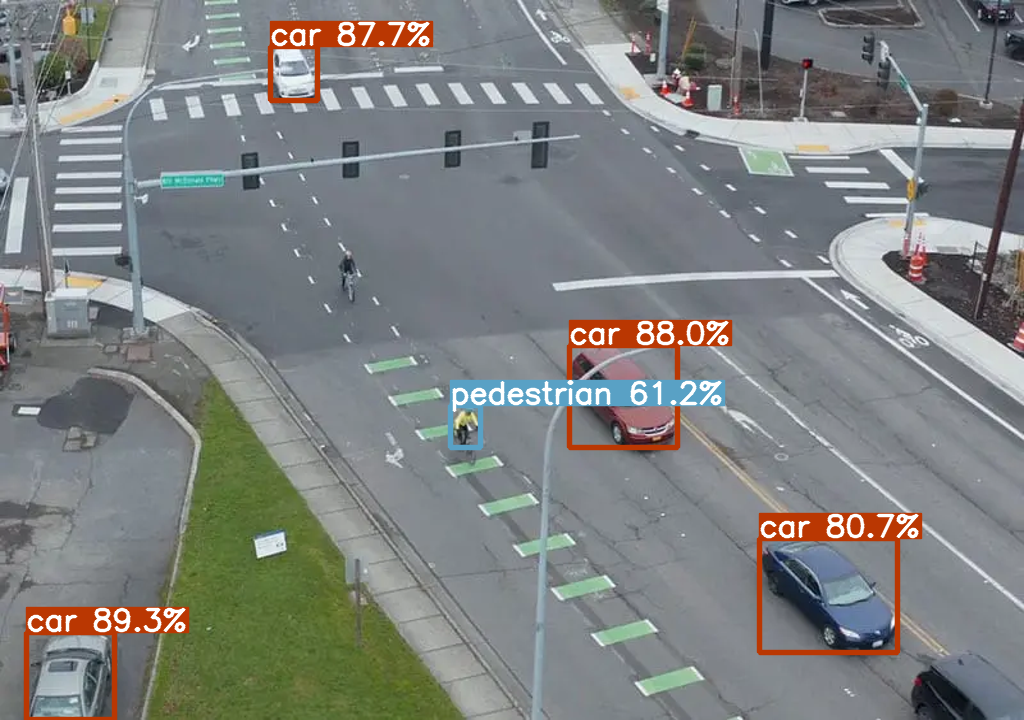

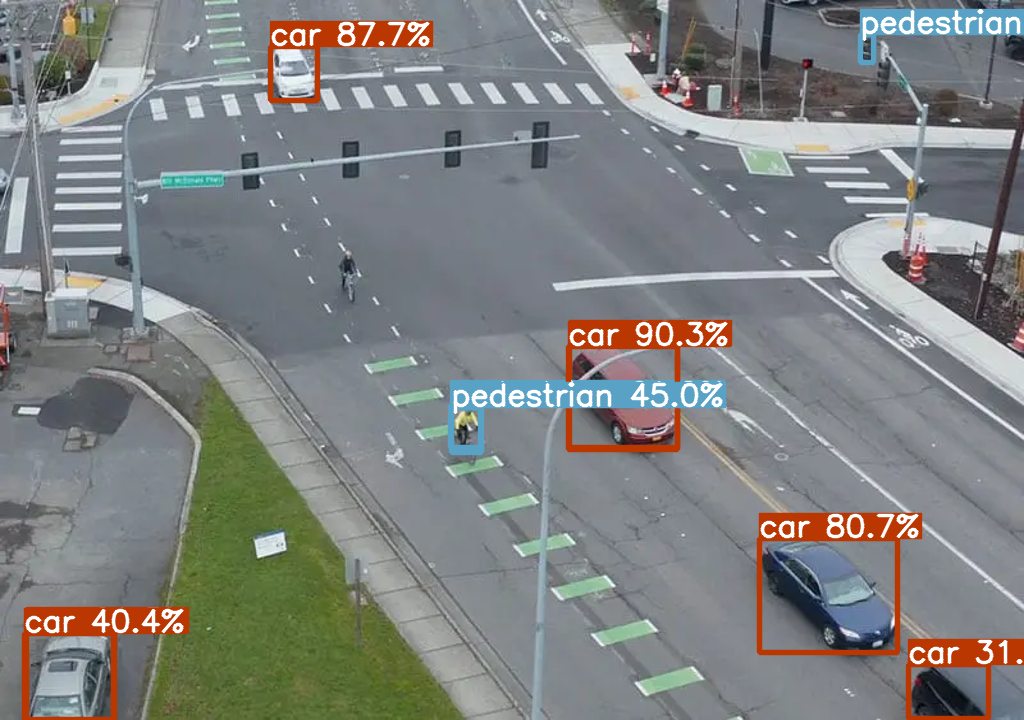

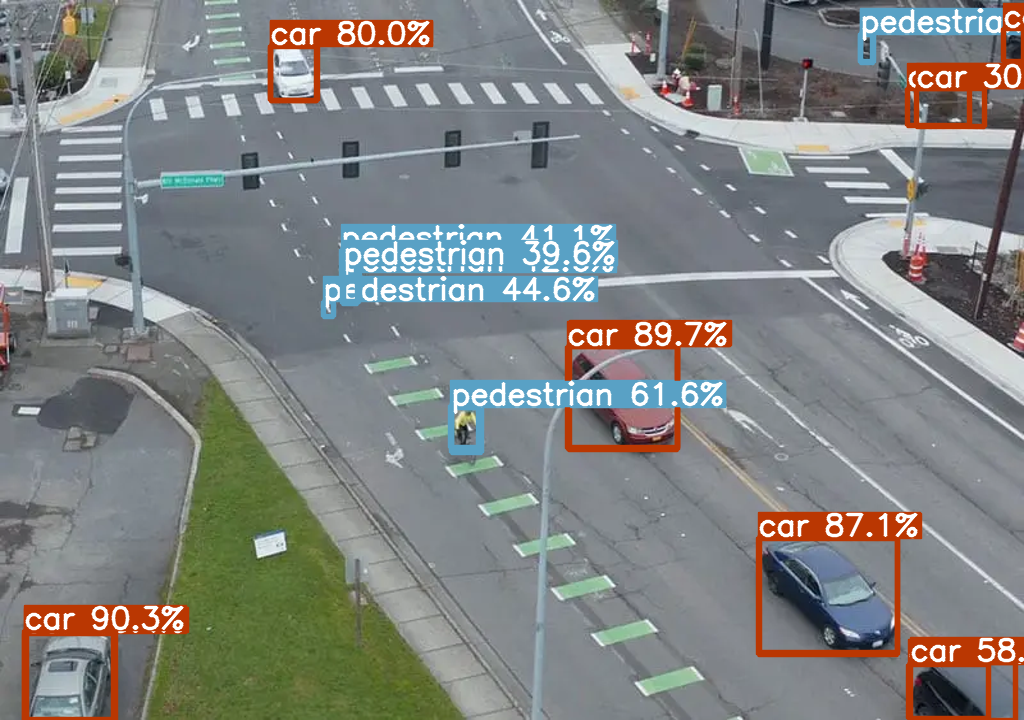

In [17]:
from PIL import Image
import io
import pathlib
import numpy as np
import cv2 # Make sure cv2 is imported here if not already

with open("/content/TRAFFIC.jpeg", "rb") as f:
    image = Image.open(io.BytesIO(f.read()))
    image = image.resize((1024, 720))
    image = np.asarray(image).copy() # Make a writable copy

plot_bboxes(image, results1[0].boxes.data, conf=0.3)
plot_bboxes(image, results2[0].boxes.data, conf=0.3)
plot_bboxes(image, results3[0].boxes.data, conf=0.3)

In [18]:
print("YOLOv8 Metrics:")
print(metrics1)

print("\nYOLOv10 Metrics:")
print(metrics2)

print("\nYOLO11 Metrics:")
print(metrics3)

YOLOv8 Metrics:
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c4558c8acc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    

In [19]:
print("YOLOv8 Metrics:")
print(f"  Precision: {metrics1.box.p}")
print(f"  F1 Score: {metrics1.box.f1}")
print(f"  mAP50: {metrics1.box.map50}") # Added mAP50
print(f"  mAP50-95: {metrics1.box.map}") # Added mAP50-95

print("\nYOLOv10 Metrics:")
print(f"  Precision: {metrics2.box.p}")
print(f"  F1 Score: {metrics2.box.f1}")
print(f"  mAP50: {metrics2.box.map50}") # Added mAP50
print(f"  mAP50-95: {metrics2.box.map}") # Added mAP50-95

print("\nYOLO11 Metrics:")
print(f"  Precision: {metrics3.box.p}")
print(f"  F1 Score: {metrics3.box.f1}")
print(f"  mAP50: {metrics3.box.map50}") # Added mAP50
print(f"  mAP50-95: {metrics3.box.map}") # Added mAP50-95

YOLOv8 Metrics:
  Precision: [    0.28681     0.37594     0.04967     0.43899     0.27524     0.28421     0.15824     0.20329     0.43783     0.19806]
  F1 Score: [    0.27798     0.19571     0.03995     0.53862     0.26104     0.23752     0.14282    0.034412     0.29907     0.24666]
  mAP50: 0.1887168876050158
  mAP50-95: 0.10522611269885758

YOLOv10 Metrics:
  Precision: [    0.18301     0.33467    0.072625     0.37342     0.19899     0.31942     0.36297     0.47161      0.2675     0.25535]
  F1 Score: [    0.23926     0.20552    0.020087     0.48499      0.2159     0.19724    0.073917   0.0074593     0.25468     0.26283]
  mAP50: 0.17003590938794283
  mAP50-95: 0.09350208703167563

YOLO11 Metrics:
  Precision: [    0.18614     0.39148    0.046743     0.48808     0.22437     0.25213     0.18268     0.10515     0.38189     0.26401]
  F1 Score: [    0.24291     0.19776    0.013325     0.56609     0.25401     0.21766    0.097527      0.0121     0.29936     0.25762]
  mAP50: 0.1883740795

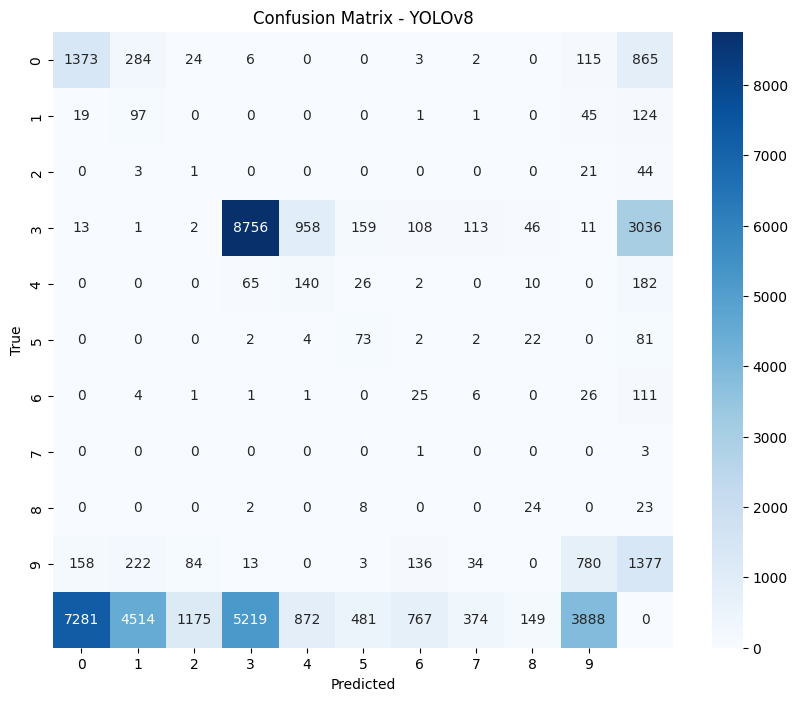

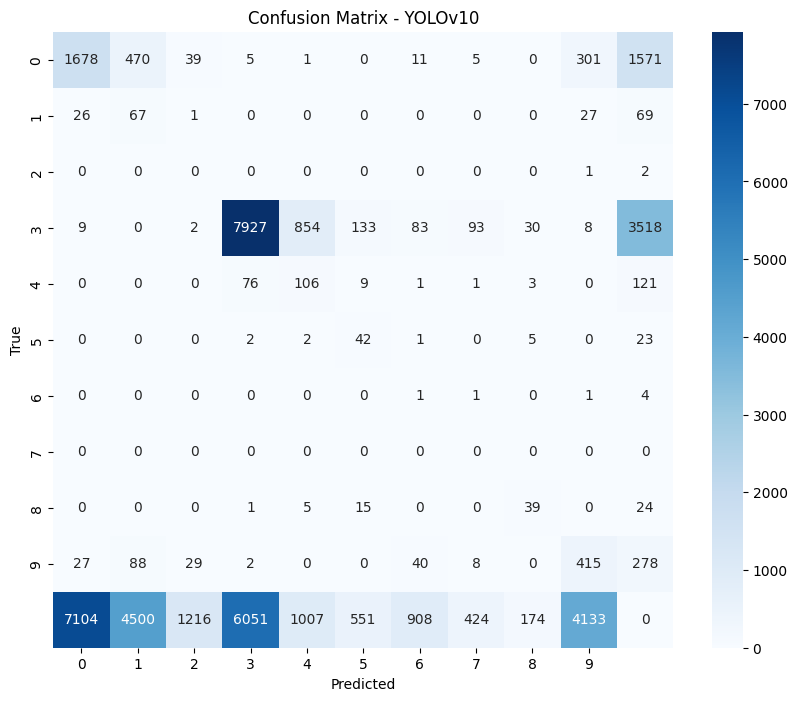

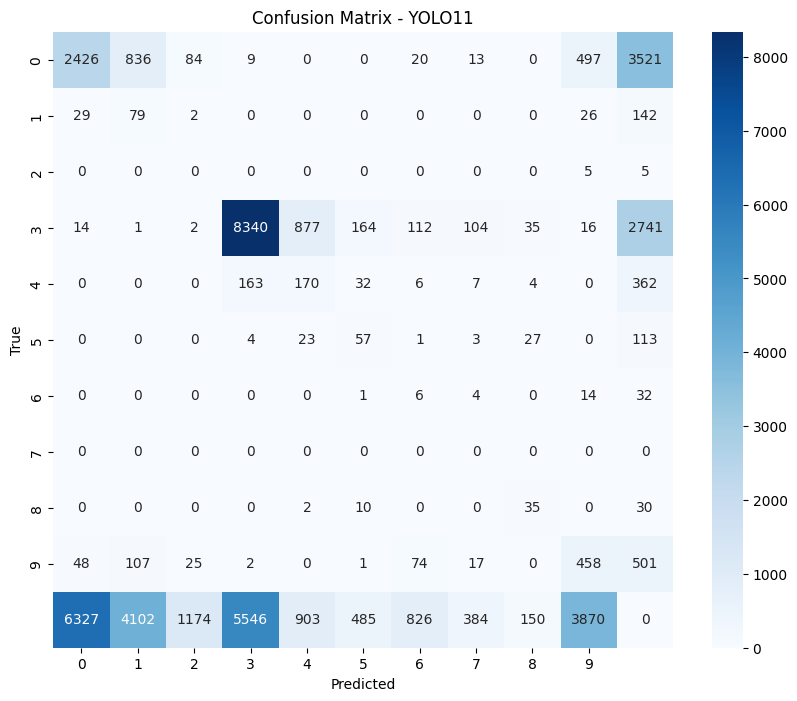

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(metrics, model_name):
    """Plots the confusion matrix from Ultralytics metrics."""
    if hasattr(metrics, 'confusion_matrix') and metrics.confusion_matrix is not None:
        cm = metrics.confusion_matrix.matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=metrics.names, yticklabels=metrics.names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
    else:
        print(f"Confusion matrix not available for {model_name}.")

# Plot confusion matrix for each model
plot_confusion_matrix(metrics1, "YOLOv8")
plot_confusion_matrix(metrics2, "YOLOv10")
plot_confusion_matrix(metrics3, "YOLO11")